In [1]:
import scanpy as sc
import omicverse as ov
import scvelo as scv

ov.ov_plot_set()



   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.4, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


In [2]:
ad = sc.read("data/depleted-bm-rna.h5ad")
ad

AnnData object with n_obs × n_vars = 8627 × 17226
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'DoubletScores', 'n_counts', 'leiden', 'phenograph', 'log_n_counts', 'celltype', 'palantir_pseudotime', 'selection', 'NaiveB_lineage', 'mellon_log_density', 'mellon_log_density_clipped'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'PeakCounts'
    uns: 'DMEigenValues', 'DM_EigenValues', 'NaiveB_lineage_colors', 'celltype_colors', 'custom_branch_mask_columns', 'hvg', 'leiden', 'mellon_log_density_predictor', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'DM_EigenVectors', 'X_FDL', 'X_pca', 'X_umap', 'branch_masks', 'chromVAR_deviations', 'palantir_branch_probs', 'palantir_fate_probabilities', 'palantir_lineage_cells'
    varm: 'PCs', 'geneXTF'
    layers: 'Bcells_lineage_specific', 'Bcells_primed', 'MAGIC_imputed_data'
    obsp: 'DM_Kernel', 'DM_Similarity', 'connectivities', 'distances', 'knn

In [3]:
ad.X.max()

12.226059

<AxesSubplot: xlabel='X_umap1', ylabel='X_umap2'>

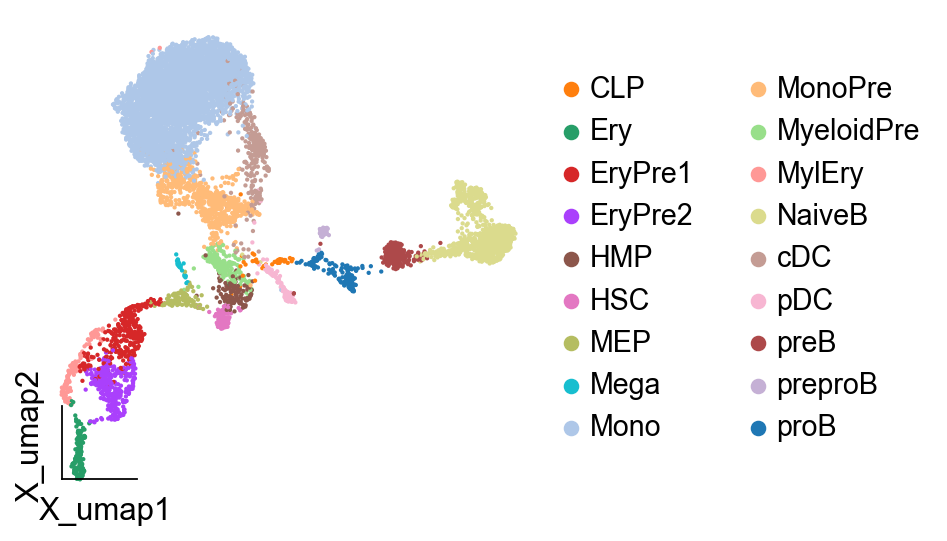

In [4]:
ov.pl.embedding(ad,
                basis="X_umap",
                color=['celltype'],title='',size=15,
                show=False, #legend_loc=None, add_outline=False, 
                frameon='small',legend_fontoutline=2,#ax=ax
)

In [5]:
ad.obs['celltype'].cat.categories


Index(['CLP', 'Ery', 'EryPre1', 'EryPre2', 'HMP', 'HSC', 'MEP', 'Mega', 'Mono',
       'MonoPre', 'MyeloidPre', 'MylEry', 'NaiveB', 'cDC', 'pDC', 'preB',
       'preproB', 'proB'],
      dtype='object')

In [6]:
new_order=['HSC','MEP','Mega','EryPre1','EryPre2','MylEry','Ery','HMP',
           'MyeloidPre','MonoPre','Mono','cDC',
           'CLP','pDC','proB','preproB','preB','NaiveB'
        ]
ad.obs['celltype']=ad.obs['celltype'].cat.reorder_categories(new_order)


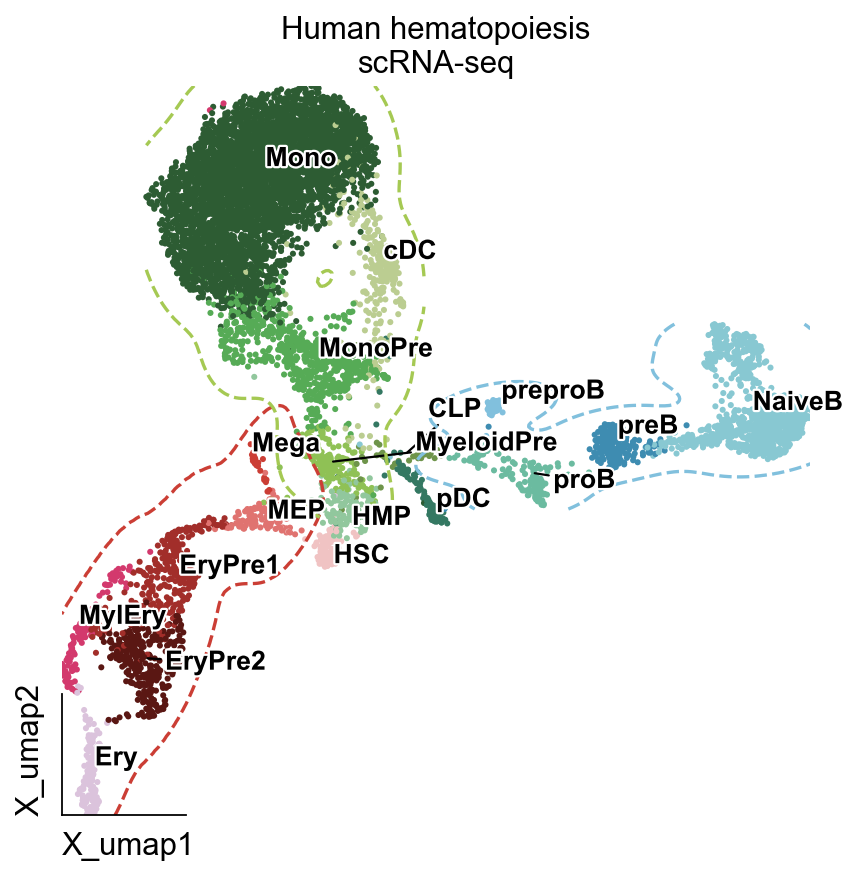

In [348]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(6,6))
ov.pl.embedding(
    ad,
    basis="X_umap",
    color=['celltype'],title='',
    show=False,  
    frameon='small',
    size=30,
    palette=ov.pl.red_color[:7]+ov.pl.green_color[:6]+ov.pl.blue_color[:],
    ax=ax,
    legend_loc=None, add_outline=False, 
)

ov.pl.embedding_adjust(
    ad,
    basis="X_umap",
    groupby='celltype',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)

ov.pl.contour(ax=ax,adata=ad,
        basis="X_umap",
        groupby='celltype',clusters=['MEP','Mega','EryPre1','EryPre2','MylEry','Ery'],
        contour_threshold=0.02,colors=ov.pl.red_color[2],linestyles='dashed')

ov.pl.contour(ax=ax,adata=ad,
        basis="X_umap",
        groupby='celltype',clusters=[
           'MyeloidPre','MonoPre','Mono','cDC',],
        contour_threshold=0.01,colors=ov.pl.green_color[6],linestyles='dashed')

ov.pl.contour(ax=ax,adata=ad,
        basis="X_umap",
        groupby='celltype',clusters=['proB','preproB','preB','NaiveB'],
        contour_threshold=0.02,colors=ov.pl.blue_color[2],linestyles='dashed')

plt.title('Human hematopoiesis\nscRNA-seq', fontsize=14)
plt.savefig(f'figures/hsc/umap-ct-66.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/hsc/umap-ct-66.pdf',dpi=300,bbox_inches='tight')



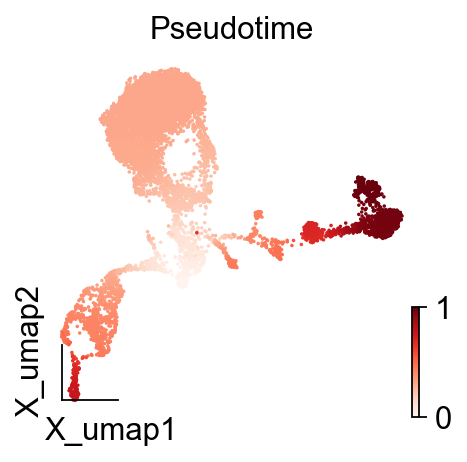

In [8]:
fig, ax = plt.subplots(figsize=(3,3))
ov.pl.embedding(
    ad,
    basis="X_umap",
    color=['palantir_pseudotime'],title='',
    show=False,  
    frameon='small',
    size=10,
    cmap='Reds',
    #palette=ov.pl.red_color[:7]+ov.pl.green_color[:6]+ov.pl.blue_color[:],
    ax=ax,
    legend_loc=None, add_outline=False, 
)
ax.set_title('Pseudotime', fontsize=14)
plt.savefig(f'figures/hsc/umap-pt-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/hsc/umap-pt-33.pdf',dpi=300,bbox_inches='tight')



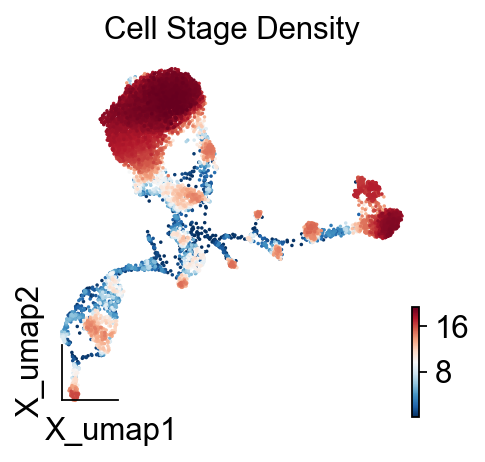

In [317]:
fig, ax = plt.subplots(figsize=(3,3))
ov.pl.embedding(
    ad,
    basis="X_umap",
    color=['mellon_log_density_lowd'],title='Cell Stage Density',
    show=False,  
    frameon='small',
    size=10,
    cmap='RdBu_r',
    #palette=ov.pl.red_color[:7]+ov.pl.green_color[:6]+ov.pl.blue_color[:],
    ax=ax,
    legend_loc=None, add_outline=False, 
)
ax.set_title('Cell Stage Density', fontsize=14)
plt.savefig(f'figures/hsc/umap-mellon-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/hsc/umap-mellon-33.pdf',dpi=300,bbox_inches='tight')



100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:000:00


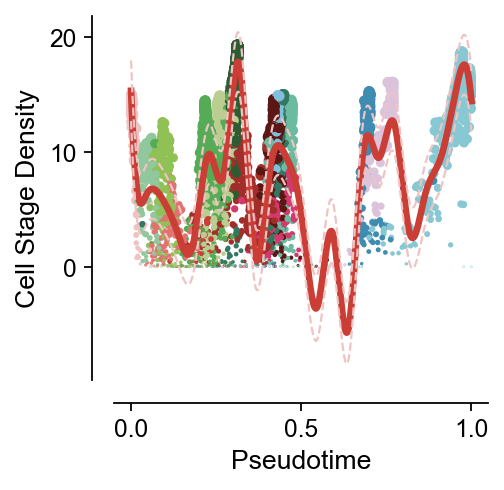

In [344]:
fig, ax = plt.subplots(figsize=(3,3))
#x=ad[ad.obs['leiden'].isin(visual_cluster),gene].to_df().values.reshape(-1)
x=ad.obs['palantir_pseudotime'].values.reshape(-1)
y=ad.obs['mellon_log_density_lowd'].values.reshape(-1)

color_dict=dict(zip(ad.obs['celltype'].cat.categories,
                   ad.uns['celltype_colors']))

from pygam import LinearGAM

gam = LinearGAM(n_splines=25).gridsearch(x.reshape(x.shape[0],1), y)
XX = gam.generate_X_grid(term=0, n=500)

plt.plot(XX, gam.predict(XX), '-',linewidth=3,
        color=ov.pl.red_color[2])
plt.plot(XX, gam.prediction_intervals(XX, width=.65), 
         color=ov.pl.red_color[0], ls='--',linewidth=1,)

ax.scatter(x,y,c=[color_dict[i] for i in ad.obs['celltype'].tolist()],
           cmap='RdBu_r',s=y)

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)


# 设置标签和标题
ax.set_xlabel('')
ax.set_ylabel('$R^2$', fontsize=13)
ax.set_title('', fontsize=13)
#ax.set_xticks(x + width)
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=11,rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

plt.xlabel('Pseudotime',fontsize=12)
plt.ylabel('Cell Stage Density',fontsize=12)
plt.title('',fontsize=12)

plt.savefig(f'figures/hsc/density-pt-leiden-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/hsc/density-pt-33.pdf',dpi=300,bbox_inches='tight')



In [9]:
cfg_obj2=ov.single.Fate(ad,pseudotime='palantir_pseudotime')
cfg_obj2.model_init()
cfg_obj2.ATR(stop=500)

$MSE|RMSE|MAE|R^2$:0.0024|0.049|0.037|0.95
coef_threshold:0.0009673292515799403, r2:0.9458897232697306


,coef_threshold,r2
0,0.002444,0.661107
1,0.002407,0.728704
2,0.002259,0.752481
3,0.002137,0.783143
4,0.002099,0.786696
...,...,...
495,0.000610,0.964707
496,0.000610,0.964685
497,0.000610,0.964671
498,0.000609,0.964718


Text(0.5, 1.0, 'HSC\nOmicFate')

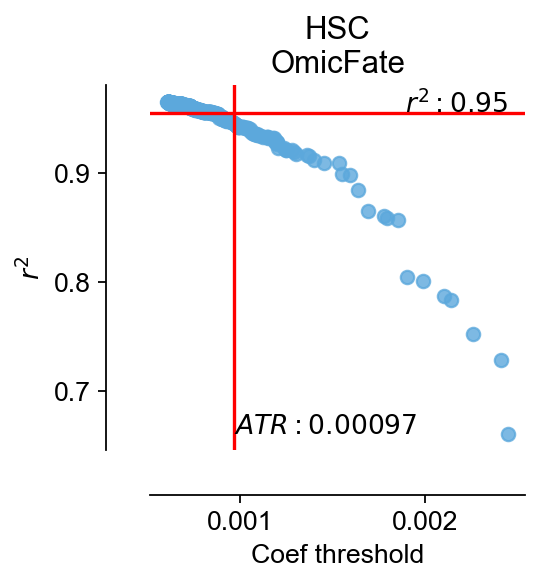

In [10]:
fig,ax=cfg_obj2.plot_filtering(color='#5ca8dc')
ax.set_title('HSC\nOmicFate')

In [11]:
res=cfg_obj2.model_fit()

$MSE|RMSE|MAE|R^2$:0.003|0.055|0.039|0.94


(<Figure size 240x240 with 1 Axes>,
 <AxesSubplot: title={'center': 'Dimension: 17226'}, xlabel='Raw', ylabel='Predicted'>)

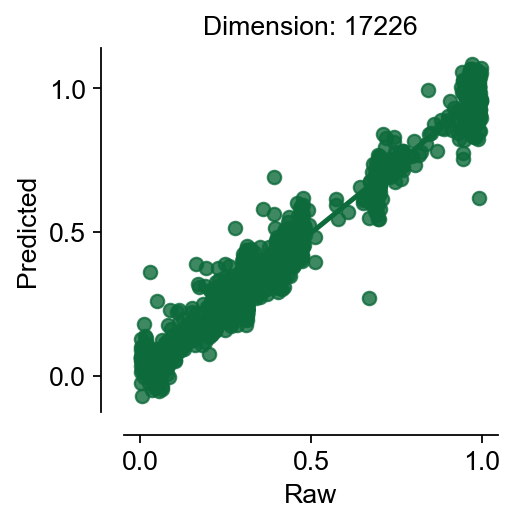

In [12]:
cfg_obj2.plot_fitting(type='raw')

Text(1.1, 0.5, 'rmse')

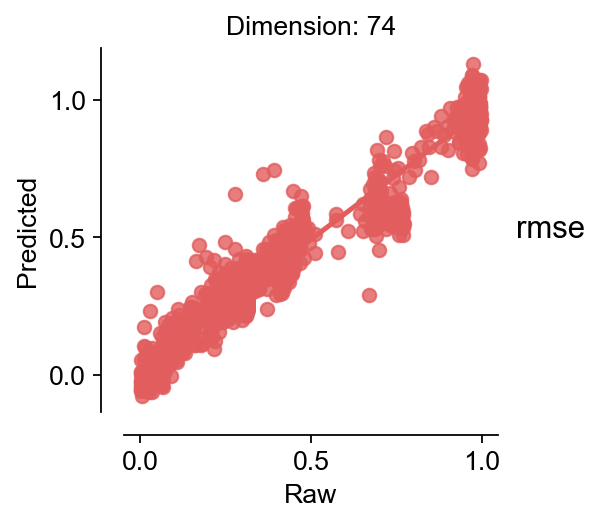

In [13]:
fig,ax=cfg_obj2.plot_fitting(type='filter',color='#e25d5d')
ax.text(1.1,0.5,'rmse')

In [14]:
var_name=cfg_obj2.filter_coef.index.tolist()

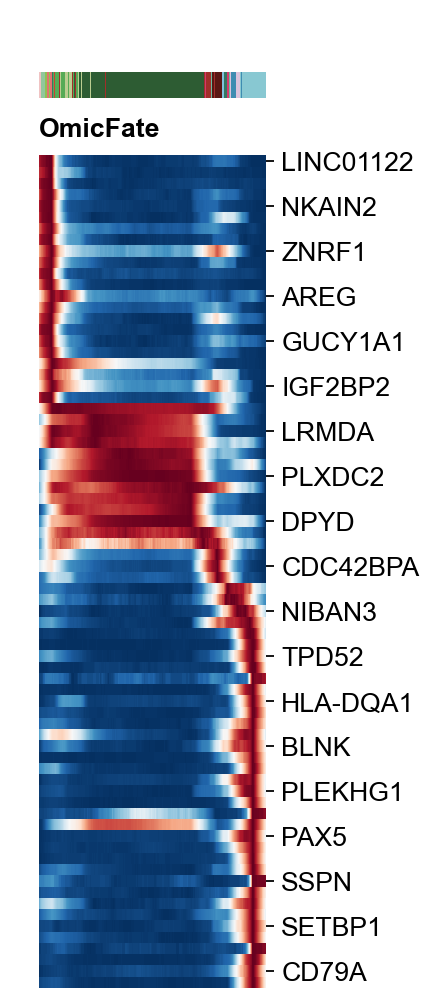

In [319]:
g=ov.utils.plot_heatmap(ad,var_names=var_name,
                  sortby='palantir_pseudotime',col_color='celltype',
                 n_convolve=1000,figsize=(1,6),show=False,)

g.fig.set_size_inches(2, 8)
g.fig.suptitle('OmicFate',x=0.25,y=0.83,
               horizontalalignment='left',fontsize=12,fontweight='bold')
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=12)

plt.savefig(f'figures/hsc/heatmap_omicfate.png',dpi=300,bbox_inches='tight')
#plt.savefig(f'pdf/hsc/heatmap_omicfate.pdf',dpi=300,bbox_inches='tight')



In [263]:
ov.pp.leiden(ad,resolution=2)

running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


<AxesSubplot: xlabel='X_umap1', ylabel='X_umap2'>

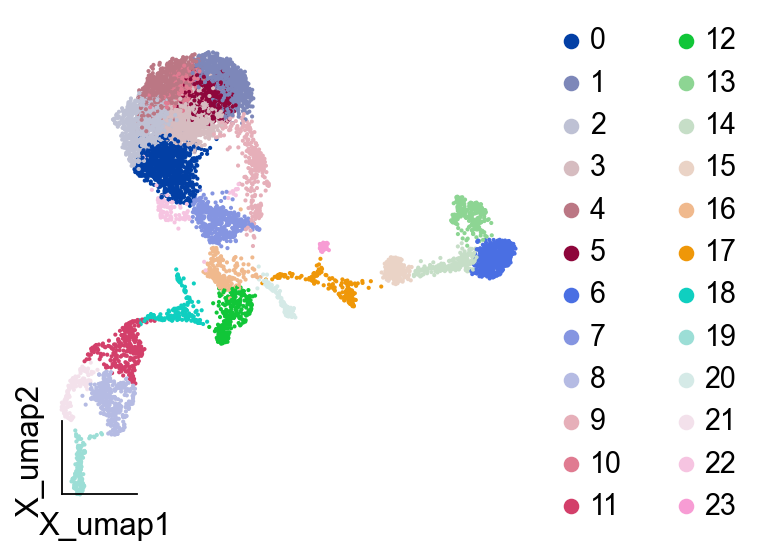

In [264]:
ov.pl.embedding(ad,
    basis="X_umap",
                  color=['leiden'],title='',#size=15,
                   show=False, #legend_loc=None, add_outline=False, 
                   frameon='small',legend_fontoutline=2,#ax=ax
                 )

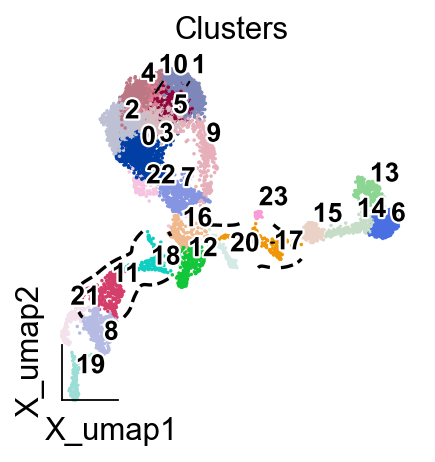

In [318]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(3,3))
ov.pl.embedding(
    ad,
    basis="X_umap",
    color=['leiden'],title='',
    show=False,  
    frameon='small',
    size=10,
    #palette=ov.pl.red_color[:7]+ov.pl.green_color[:6]+ov.pl.blue_color[:],
    ax=ax,
    legend_loc=None, add_outline=False, 
)

ov.pl.embedding_adjust(
    ad,
    basis="X_umap",
    groupby='leiden',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)

ov.pl.contour(ax=ax,adata=ad,
        basis="X_umap",
        groupby='leiden',clusters=['18','11'],
        contour_threshold=0.02,colors='#000000',linestyles='dashed')

ov.pl.contour(ax=ax,adata=ad,
        basis="X_umap",
        groupby='leiden',clusters=[
           '20','17'],
        contour_threshold=0.01,colors='#000000',linestyles='dashed')

plt.title('Clusters', fontsize=14)
plt.savefig(f'figures/hsc/umap-leiden-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/hsc/umap-leiden-33.pdf',dpi=300,bbox_inches='tight')



In [19]:
cfg_obj2.low_density(pca_key='X_pca')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:24)
[2024-07-03 19:08:55,413] [INFO    ] Using sparse Gaussian Process since n_landmarks (5,000) < n_samples (8,627) and rank = 1.0.
[2024-07-03 19:08:55,413] [INFO    ] Computing nearest neighbor distances.
[2024-07-03 19:08:56,743] [INFO    ] Using d=1.7352303437057968.
[2024-07-03 19:08:56,903] [INFO    ] Using covariance function Matern52(ls=0.0010437683199839192).
[2024-07-03 19:08:56,905] [INFO    ] Computing 5,000 landmarks with k-means clustering.
[2024-07-03 19:09:05,410] [INFO    ] Using rank 5,000 covariance representation.
[2024-07-03 19:09:07,284] [INFO    ] Running inference using L-BFGS-B.


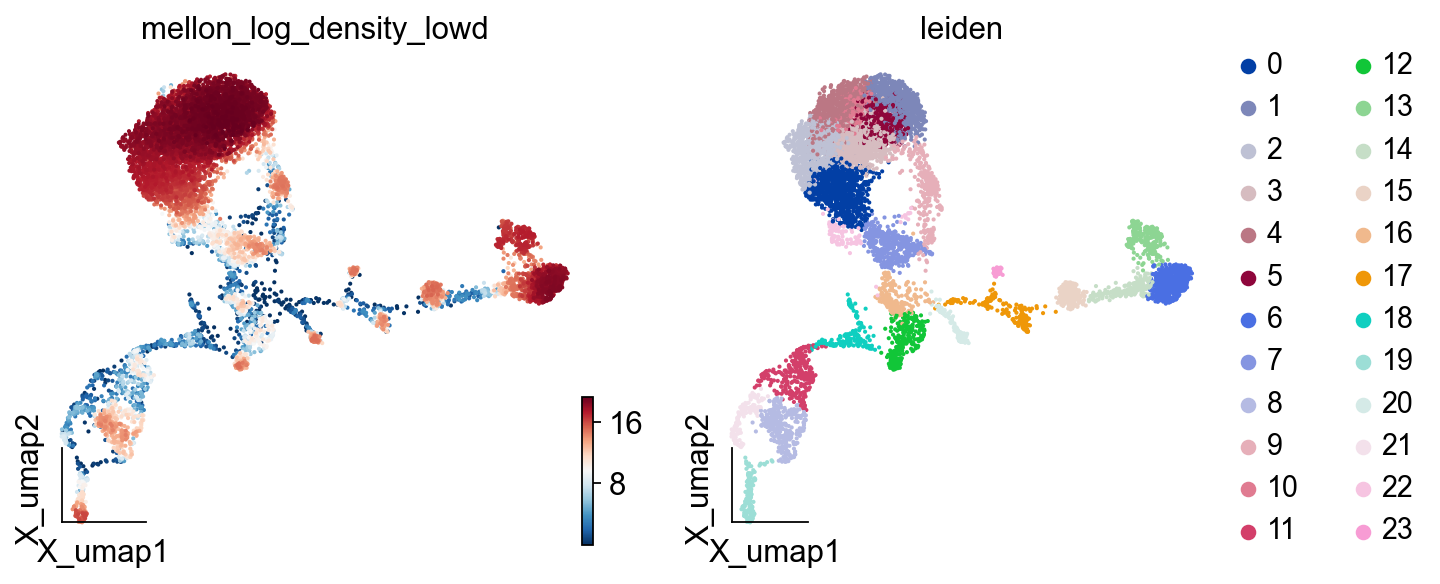

In [265]:
ov.pl.embedding(ad,
                basis='X_umap',
                color=['mellon_log_density_lowd','leiden'],
                frameon='small',
               cmap='RdBu_r')

In [22]:
ad

AnnData object with n_obs × n_vars = 8627 × 17226
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'DoubletScores', 'n_counts', 'leiden', 'phenograph', 'log_n_counts', 'celltype', 'palantir_pseudotime', 'selection', 'NaiveB_lineage', 'mellon_log_density', 'mellon_log_density_clipped', 'mellon_log_density_lowd'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'PeakCounts'
    uns: 'DMEigenValues', 'DM_EigenValues', 'NaiveB_lineage_colors', 'celltype_colors', 'custom_branch_mask_columns', 'hvg', 'leiden', 'mellon_log_density_predictor', 'neighbors', 'pca', 'sample_colors', 'umap', 'leiden_colors'
    obsm: 'DM_EigenVectors', 'X_FDL', 'X_pca', 'X_umap', 'branch_masks', 'chromVAR_deviations', 'palantir_branch_probs', 'palantir_fate_probabilities', 'palantir_lineage_cells'
    varm: 'PCs', 'geneXTF'
    layers: 'Bcells_lineage_specific', 'Bcells_primed', 'MAGIC_imputed_data'
    obsp: 'DM_Kernel', 'DM_Simi

## PreB

In [303]:
cfg_obj2.lineage_score(cluster_key='leiden',lineage=['20','17'],
                      expression_key='MAGIC_imputed_data')
#palantir,mellon

Calculating lineage score
The lineage score stored in adata.var['change_scores_lineage']


In [304]:
scores = ad.var["change_scores_lineage"]
scores.sort_values(ascending=False)

EBF1          0.001612
DIAPH3        0.001492
MIR924HG      0.001400
AL589693.1    0.001340
ATP8B4        0.001336
                ...   
KCNE1B        0.000000
AC110741.1    0.000000
AP001528.1    0.000000
CXCL1         0.000000
AC104809.2    0.000000
Name: change_scores_lineage, Length: 17226, dtype: float64

In [305]:
od_genes=scores.loc[cfg_obj2.filter_coef.index].sort_values(ascending=False)[:20]
od_genes

EBF1      0.001612
ATP8B4    0.001336
ERG       0.001141
LRMDA     0.000984
SLC8A1    0.000790
NKAIN2    0.000780
PAX5      0.000735
RNF220    0.000676
PLXDC2    0.000671
CASC15    0.000639
SEL1L3    0.000539
SETBP1    0.000530
EZH2      0.000515
BLNK      0.000439
MSRB3     0.000429
NIBAN3    0.000416
NUSAP1    0.000415
FRY       0.000392
AFF3      0.000378
MEIS1     0.000369
Name: change_scores_lineage, dtype: float64

In [306]:
del ad.raw

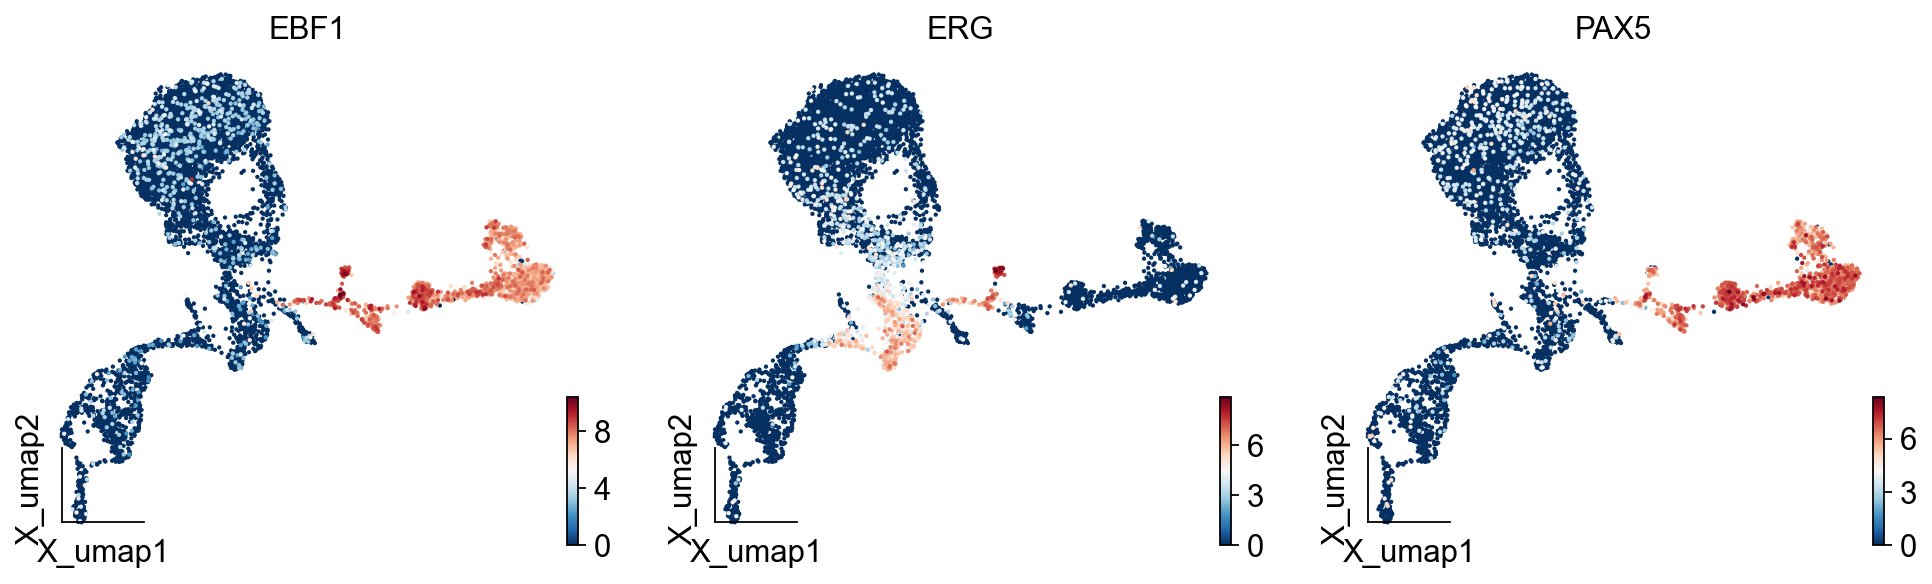

In [289]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
#fig, ax = plt.subplots(figsize=(3,3))

ov.pl.embedding(ad,
                basis='X_umap',
                color=['EBF1','ERG','PAX5'],
                frameon='small',
                size=15,
               cmap='RdBu_r',)

In [282]:
visual_cluster

['18', '11']

In [218]:
tuple(set(ad.obs['celltype'].cat.categories)-set(visual_cluster))

('EryPre1',
 'EryPre2',
 'NaiveB',
 'preB',
 'Mega',
 'proB',
 'preproB',
 'pDC',
 'MyeloidPre',
 'HMP',
 'MonoPre',
 'CLP',
 'Mono',
 'cDC',
 'MEP',
 'HSC',
 'MylEry',
 'Ery')

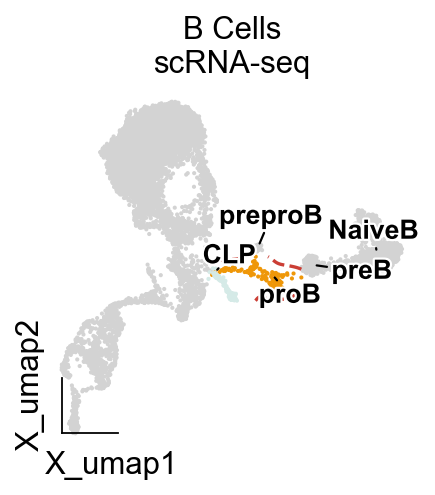

In [307]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(3,3))

visual_cluster=['20','17']
ad.obs['visual']=ad.obs['leiden'].copy()
ad.obs.loc[~ad.obs['leiden'].isin(visual_cluster),'visual']=None
ov.utils.embedding(ad,
                basis='X_umap',frameon='small',
                color=['visual'],
                legend_loc=None,
                #palette=ov.utils.blue_color+ov.utils.orange_color+ov.utils.red_color+ov.utils.green_color,
                show=False,
                  ax=ax)

ov.pl.embedding_adjust(
    ad,
    basis="X_umap",
    groupby='celltype',
    exclude=tuple(set(ad.obs['celltype'].cat.categories)-set(['CLP','proB', 'preproB', 'preB', 'NaiveB'])),  
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)

ov.pl.contour(ax=ax,adata=ad,
        basis="X_umap",
        groupby='leiden',clusters=visual_cluster,
        contour_threshold=0.02,colors=ov.pl.red_color[2],linestyles='dashed')

plt.title('B Cells\nscRNA-seq', fontsize=14)
plt.savefig(f'figures/hsc/umap-lineage-B-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/hsc/umap-lineage-B-33.pdf',dpi=300,bbox_inches='tight')


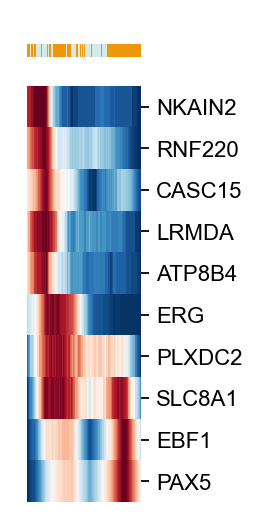

In [353]:
import matplotlib.pyplot as plt
g=ov.utils.plot_heatmap(ad[ad.obs['leiden'].isin(visual_cluster)],
                        var_names=scores.loc[cfg_obj2.filter_coef.index].sort_values(ascending=False)[:10].index.tolist(),
                  sortby='palantir_pseudotime',col_color='leiden',yticklabels=True,
                 n_convolve=100,figsize=(1,6),show=False)

g.fig.set_size_inches(1, 4)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=10)

plt.savefig(f'figures/hsc/heatmap-lineage-B-leiden-24.png',dpi=300,bbox_inches='tight')

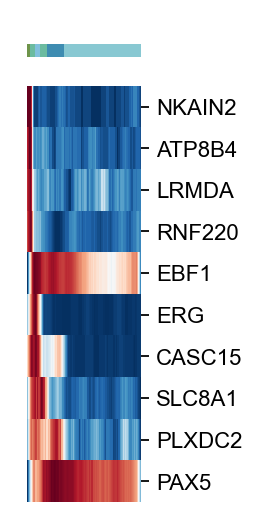

In [354]:
import matplotlib.pyplot as plt
g=ov.utils.plot_heatmap(ad[ad.obs['celltype'].isin(['CLP','proB','preproB','preB','NaiveB'])],
                        var_names=scores.loc[cfg_obj2.filter_coef.index].sort_values(ascending=False)[:10].index.tolist(),
                  sortby='palantir_pseudotime',col_color='celltype',yticklabels=True,
                 n_convolve=100,figsize=(1,6),show=False)

g.fig.set_size_inches(1, 4)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=10)

plt.savefig(f'figures/hsc/heatmap-lineage-B-ct-24.png',dpi=300,bbox_inches='tight')

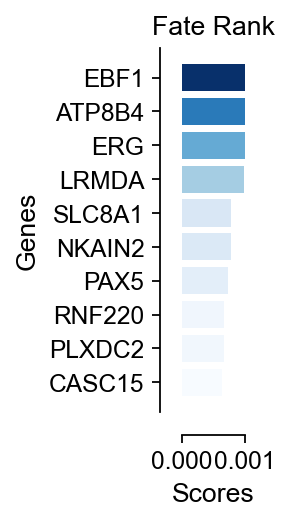

In [352]:
# 创建横向柱状图
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(0.5, 3))

od_genes=scores.loc[cfg_obj2.filter_coef.index].sort_values(ascending=False)[:10]

norm = plt.Normalize(min(od_genes.values), max(od_genes.values))
colors = cm.Blues(norm(od_genes.values))

plt.barh(od_genes.index, od_genes.values, color=colors)

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

# 设置标签和标题
ax.set_xlabel('')
ax.set_ylabel('$R^2$', fontsize=13)
ax.set_title('', fontsize=13)
ax.set_xlim(0,0.001)
#ax.set_xticks(x + width)
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=11,rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

plt.xlabel('Scores',fontsize=12)
plt.ylabel('Genes',fontsize=12)
plt.title('Fate Rank',fontsize=12)
plt.gca().invert_yaxis()  # 反转y轴使得最高分数在顶部

plt.savefig(f'figures/hsc/fr-lineage-B-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/hsc/fr-lineage-B-33.pdf',dpi=300,bbox_inches='tight')


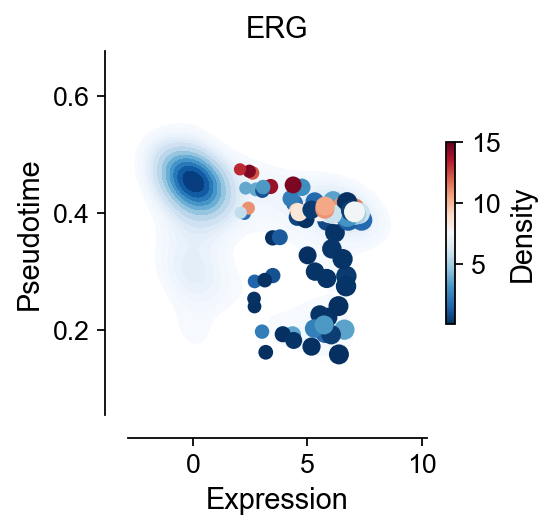

In [314]:
fig, ax = plt.subplots(figsize=(3,3))

gene='ERG'
visual_cluster=['20','17']

x=ad[ad.obs['leiden'].isin(visual_cluster),gene].to_df().values.reshape(-1)
y=ad.obs.loc[ad.obs['leiden'].isin(visual_cluster),'palantir_pseudotime'].values.reshape(-1)
z=ad.obs.loc[ad.obs['leiden'].isin(visual_cluster),'mellon_log_density_lowd'].values.reshape(-1)

sns.kdeplot(
        x=x, y=y,
        fill=True,
        cmap='Blues',
        #clip=(-5, 5), cut=10,
        thresh=0.1, levels=15,
        ax=ax,#cbar=True,
    )
scatter=ax.scatter(x,y,
           c=z, s=x*10,
           cmap='RdBu_r',
          )

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

plt.xlabel('Expression',fontsize=13)
plt.ylabel('Pseudotime',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title(gene,fontsize=13)
cbar = plt.colorbar(scatter, ax=ax,shrink=0.5)
cbar.set_label('Density', fontsize=13)
cbar.ax.tick_params(labelsize=12)

plt.savefig(f'figures/hsc/density-lineage-B-{gene}.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/hsc/density-lineage-B-{gene}.pdf',dpi=300,bbox_inches='tight')

#cbar.set_ticklabels(cbar.get_ticklabels(),fontsize=12)

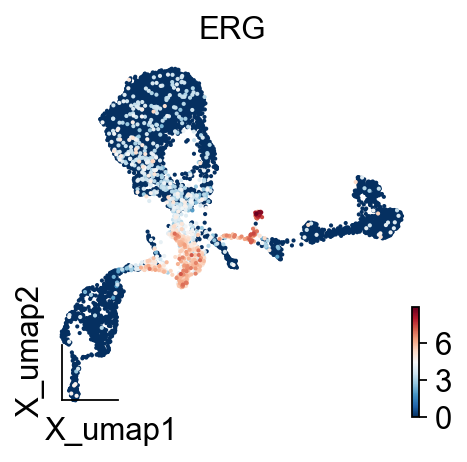

In [315]:
fig, ax = plt.subplots(figsize=(3,3))

#visual_cluster=['15','12']
#ad.obs['visual']=ad.obs['leiden'].copy()
#ad.obs.loc[~ad.obs['leiden'].isin(visual_cluster),'visual']=None
ov.utils.embedding(ad,
                basis='X_umap',frameon='small',
                color=[gene],
                legend_loc=None,
                #palette=ov.utils.blue_color+ov.utils.orange_color+ov.utils.red_color+ov.utils.green_color,
                show=False,
                ax=ax)
plt.savefig(f'figures/hsc/umap-lineage-B-{gene}.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/hsc/umap-lineage-B-{gene}.pdf',dpi=300,bbox_inches='tight')


## Ery

In [355]:
cfg_obj2.lineage_score(cluster_key='leiden',lineage=['18','11'],
                      expression_key='MAGIC_imputed_data')

Calculating lineage score
The lineage score stored in adata.var['change_scores_lineage']


In [356]:
scores = ad.var["change_scores_lineage"]
scores.sort_values(ascending=False)

ZNF385D       1.250601e-03
XACT          1.210155e-03
RYR3          8.297856e-04
MIR924HG      7.991714e-04
AC069410.1    7.495316e-04
                  ...     
ENPP1         1.642456e-09
AC012645.3    1.248355e-09
AL022098.1    1.010380e-09
SPTBN5        7.588136e-10
AC002480.2    4.934383e-10
Name: change_scores_lineage, Length: 17226, dtype: float64

In [357]:
od_genes=scores.loc[cfg_obj2.filter_coef.index].sort_values(ascending=False)[:20]
od_genes

ZNF385D     0.001251
ATP8B4      0.000659
NKAIN2      0.000572
PRKG1       0.000467
PLXDC2      0.000365
MEIS1       0.000362
MED12L      0.000360
CASC15      0.000354
AFF3        0.000326
ERG         0.000310
LRMDA       0.000255
NAALADL2    0.000251
RNF220      0.000223
CDC42BPA    0.000219
MSRB3       0.000204
MIR99AHG    0.000194
ADGRG6      0.000191
DANT2       0.000180
PLCB4       0.000176
DPYD        0.000175
Name: change_scores_lineage, dtype: float64

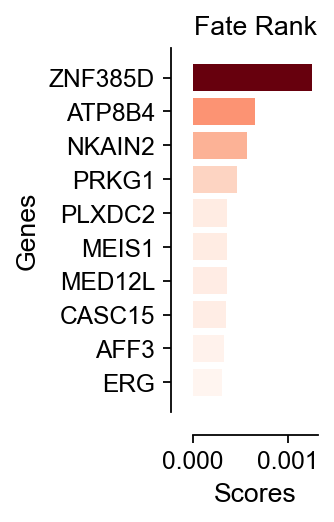

In [269]:
# 创建横向柱状图
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(1, 3))

od_genes=scores.loc[cfg_obj2.filter_coef.index].sort_values(ascending=False)[:10]

norm = plt.Normalize(min(od_genes.values), max(od_genes.values))
colors = cm.Reds(norm(od_genes.values))

plt.barh(od_genes.index, od_genes.values, color=colors)

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

# 设置标签和标题
ax.set_xlabel('')
ax.set_ylabel('$R^2$', fontsize=13)
ax.set_title('', fontsize=13)
#ax.set_xticks(x + width)
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=11,rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

plt.xlabel('Scores',fontsize=12)
plt.ylabel('Genes',fontsize=12)
plt.title('Fate Rank',fontsize=12)
plt.gca().invert_yaxis()  # 反转y轴使得最高分数在顶部

plt.savefig(f'figures/hsc/fr-lineage-Ery-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/hsc/fr-lineage-Ery-33.pdf',dpi=300,bbox_inches='tight')


In [251]:
del ad.raw

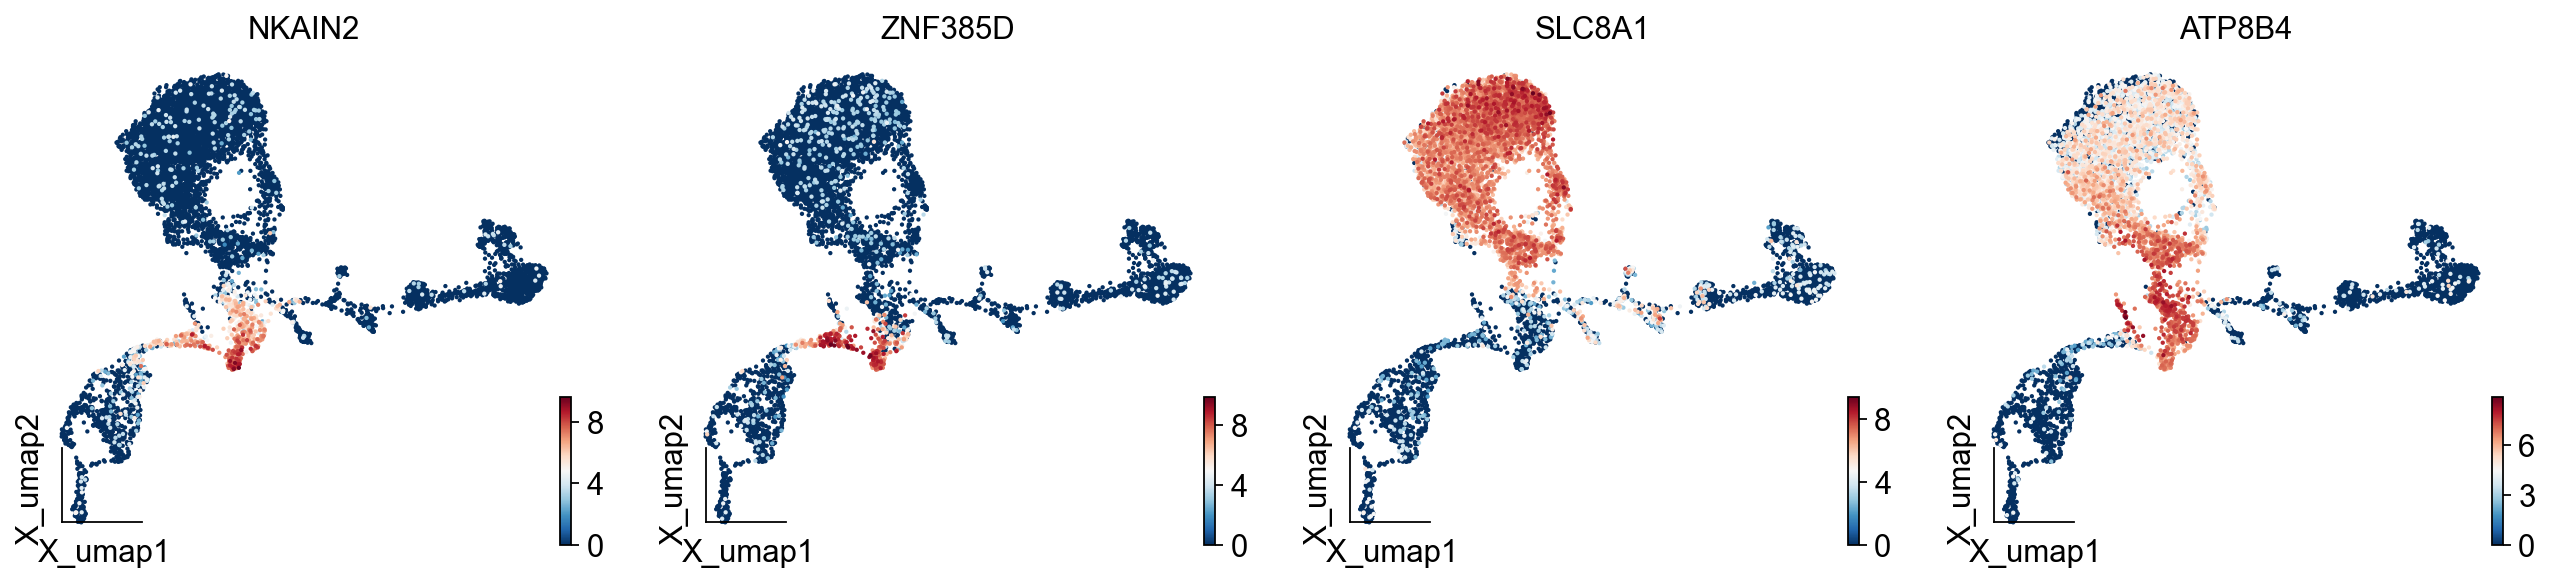

In [252]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
#fig, ax = plt.subplots(figsize=(3,3))

ov.pl.embedding(ad,
                basis='X_umap',
                color=['NKAIN2','ZNF385D','SLC8A1','ATP8B4'],
                frameon='small',
                size=15,
               cmap='RdBu_r',)

In [47]:
visual_cluster

(['proB', 'preproB', 'preB', 'NaiveB'],)

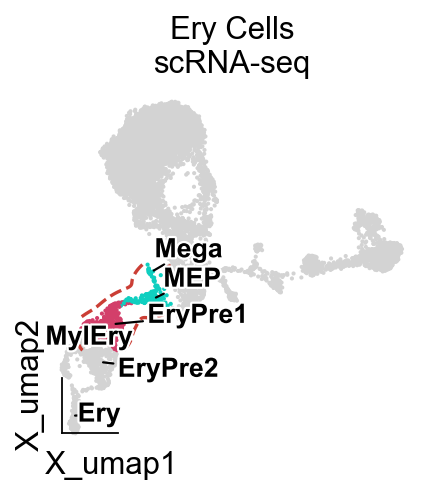

In [359]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(3,3))

visual_cluster=['18','11']
ad.obs['visual']=ad.obs['leiden'].copy()
ad.obs.loc[~ad.obs['leiden'].isin(visual_cluster),'visual']=None
ov.utils.embedding(ad,
                basis='X_umap',frameon='small',
                color=['visual'],
                legend_loc=None,
                #palette=ov.utils.blue_color+ov.utils.orange_color+ov.utils.red_color+ov.utils.green_color,
                show=False,
                  ax=ax)

ov.pl.embedding_adjust(
    ad,
    basis="X_umap",
    groupby='celltype',
    exclude=tuple(set(ad.obs['celltype'].cat.categories)-set(['MEP','Mega','EryPre1','EryPre2','MylEry','Ery'])),  
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)


ov.pl.contour(ax=ax,adata=ad,
        basis="X_umap",
        groupby='leiden',clusters=visual_cluster,
        contour_threshold=0.02,colors=ov.pl.red_color[2],linestyles='dashed')

plt.title('Ery Cells\nscRNA-seq', fontsize=14)
plt.savefig(f'figures/hsc/umap-lineage-ery-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/hsc/umap-lineage-ery-33.pdf',dpi=300,bbox_inches='tight')


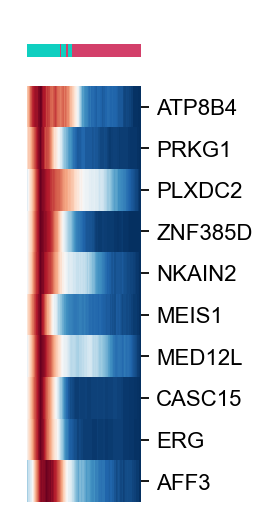

In [360]:
import matplotlib.pyplot as plt
g=ov.utils.plot_heatmap(ad[ad.obs['leiden'].isin(visual_cluster)],
                        var_names=scores.loc[cfg_obj2.filter_coef.index].sort_values(ascending=False)[:10].index.tolist(),
                  sortby='palantir_pseudotime',col_color='leiden',yticklabels=True,
                 n_convolve=100,figsize=(1,6),show=False)

g.fig.set_size_inches(1, 4)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=10)

plt.savefig(f'figures/hsc/heatmap-lineage-Ery-leiden-24.png',dpi=300,bbox_inches='tight')

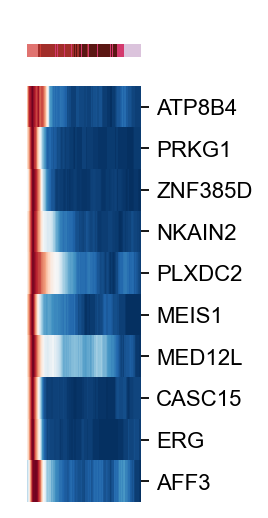

In [361]:
import matplotlib.pyplot as plt
g=ov.utils.plot_heatmap(ad[ad.obs['celltype'].isin(['MEP','Mega','EryPre1','EryPre2','MylEry','Ery'])],
                        var_names=scores.loc[cfg_obj2.filter_coef.index].sort_values(ascending=False)[:10].index.tolist(),
                  sortby='palantir_pseudotime',col_color='celltype',yticklabels=True,
                 n_convolve=100,figsize=(1,6),show=False)

g.fig.set_size_inches(1, 4)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=10)

plt.savefig(f'figures/hsc/heatmap-lineage-Ery-ct-24.png',dpi=300,bbox_inches='tight')

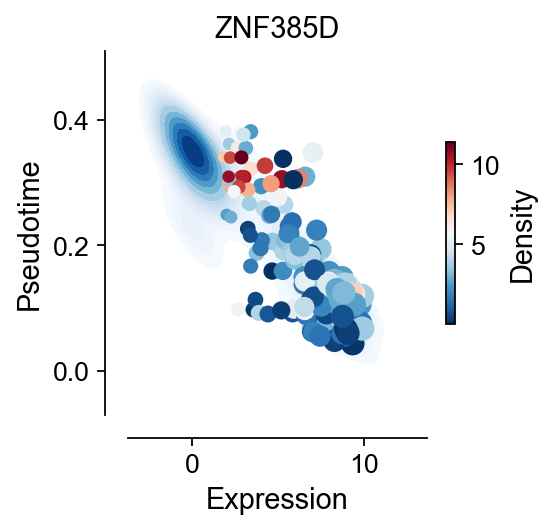

In [275]:
fig, ax = plt.subplots(figsize=(3,3))

gene='ZNF385D'
visual_cluster=['18','11']
x=ad[ad.obs['leiden'].isin(visual_cluster),gene].to_df().values.reshape(-1)
y=ad.obs.loc[ad.obs['leiden'].isin(visual_cluster),'palantir_pseudotime'].values.reshape(-1)
z=ad.obs.loc[ad.obs['leiden'].isin(visual_cluster),'mellon_log_density_lowd'].values.reshape(-1)

sns.kdeplot(
        x=x, y=y,
        fill=True,
        cmap='Blues',
        #clip=(-5, 5), cut=10,
        thresh=0.1, levels=15,
        ax=ax,#cbar=True,
    )
scatter=ax.scatter(x,y,
           c=z, s=x*10,
           cmap='RdBu_r',
                  #vmin=100, 
          )

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

plt.xlabel('Expression',fontsize=13)
plt.ylabel('Pseudotime',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title(gene,fontsize=13)
cbar = plt.colorbar(scatter, ax=ax,shrink=0.5)
cbar.set_label('Density', fontsize=13)
cbar.ax.tick_params(labelsize=12)

plt.savefig(f'figures/hsc/density-lineage-Ery-{gene}.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/hsc/density-lineage-Ery-{gene}.pdf',dpi=300,bbox_inches='tight')

#cbar.set_ticklabels(cbar.get_ticklabels(),fontsize=12)

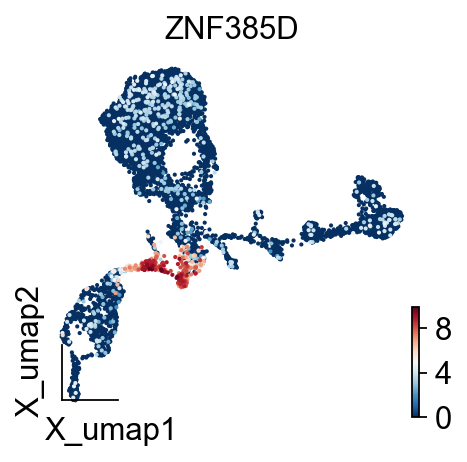

In [276]:
fig, ax = plt.subplots(figsize=(3,3))

#visual_cluster=['15','12']
#ad.obs['visual']=ad.obs['leiden'].copy()
#ad.obs.loc[~ad.obs['leiden'].isin(visual_cluster),'visual']=None
ov.utils.embedding(ad,
                basis='X_umap',frameon='small',
                color=[gene],
                legend_loc=None,
                #palette=ov.utils.blue_color+ov.utils.orange_color+ov.utils.red_color+ov.utils.green_color,
                show=False,
                ax=ax)
plt.savefig(f'figures/hsc/umap-lineage-Ery-{gene}.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/hsc/umap-lineage-Ery-{gene}.pdf',dpi=300,bbox_inches='tight')


## Mono

In [86]:
cfg_obj2.lineage_score(cluster_key='leiden',lineage=['6','2'],
                      expression_key='MAGIC_imputed_data')

Calculating lineage score
The lineage score stored in adata.var['change_scores_lineage']


In [87]:
scores = ad.var["change_scores_lineage"]
scores.sort_values(ascending=False)

PDE4D         9.253845e-05
KCNQ5         9.015646e-05
AUTS2         7.533955e-05
PRLR          7.261091e-05
DIAPH3        7.184844e-05
                  ...     
AL162464.1    1.618875e-14
CFAP46        1.259786e-14
AC004832.1    1.124379e-14
AC019127.1    8.298374e-16
TNFRSF18      0.000000e+00
Name: change_scores_lineage, Length: 17226, dtype: float64

In [88]:

od_genes

ARHGAP24    0.000054
AFF3        0.000043
MSRB3       0.000034
AREG        0.000030
NAALADL2    0.000029
KLF12       0.000027
LRMDA       0.000026
SLC8A1      0.000024
RNF220      0.000023
DANT2       0.000022
EZH2        0.000017
ATP8B4      0.000016
MED12L      0.000015
ERG         0.000013
SEL1L3      0.000013
NKAIN2      0.000012
HLA-DQA1    0.000012
DPYD        0.000011
SCN9A       0.000010
PLXDC2      0.000010
Name: change_scores_lineage, dtype: float64

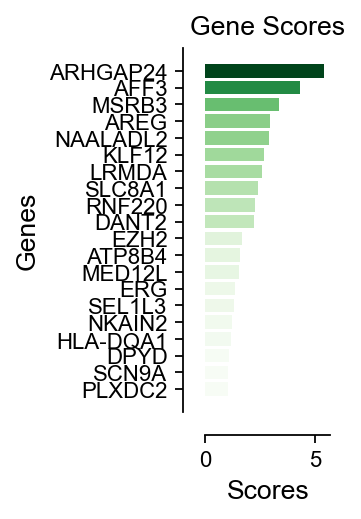

In [107]:
# 创建横向柱状图
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(1, 3))

od_genes=scores.loc[cfg_obj2.filter_coef.index].sort_values(ascending=False)[:10]

norm = plt.Normalize(min(od_genes.values), max(od_genes.values))
colors = cm.Greens(norm(od_genes.values))

plt.barh(od_genes.index, od_genes.values, color=colors)

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

# 设置标签和标题
ax.set_xlabel('')
ax.set_ylabel('$R^2$', fontsize=13)
ax.set_title('', fontsize=13)
#ax.set_xticks(x + width)
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=12,rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.xlabel('Scores',fontsize=12)
plt.ylabel('Genes',fontsize=12)
plt.title('Gene Scores',fontsize=12)
plt.gca().invert_yaxis()  # 反转y轴使得最高分数在顶部

In [109]:
ad[:,'AFF3'].to_df()

,AFF3
IM-1393_BoneMarrow_TcellDep_1_multiome#GTGAGCGAGTCTCACC-1,6.693680
IM-1393_BoneMarrow_TcellDep_1_multiome#GAGTCAAAGTCCTTCA-1,1.687871
IM-1393_BoneMarrow_TcellDep_1_multiome#TGTGCGCAGTCGCTAG-1,0.000000
IM-1393_BoneMarrow_TcellDep_1_multiome#ATATGTCCAATGCCTA-1,0.000000
IM-1393_BoneMarrow_TcellDep_1_multiome#CTTAGTTTCGCTAGTG-1,4.266829
...,...
IM-1393_BoneMarrow_TcellDep_2_multiome#ATCCGTGAGGGATTAG-1,0.000000
IM-1393_BoneMarrow_TcellDep_2_multiome#ATTTAGGTCAGGTTTA-1,0.000000
IM-1393_BoneMarrow_TcellDep_2_multiome#GATGGACAGATAAAGC-1,0.000000
IM-1393_BoneMarrow_TcellDep_2_multiome#GAAGGCTAGCTATATG-1,0.000000


In [111]:
ad.obs.head()

,sample,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,batch,DoubletScores,n_counts,leiden,phenograph,log_n_counts,celltype,palantir_pseudotime,selection,NaiveB_lineage,mellon_log_density,mellon_log_density_clipped,mellon_log_density_lowd,visual
IM-1393_BoneMarrow_TcellDep_1_multiome#GTGAGCGAGTCTCACC-1,IM-1393_BoneMarrow_TcellDep_1_multiome,2501,5612.0,735.0,13.096934,0,0.061947,5593.0,5,3,3.749118,MonoPre,0.138621,False,False,101.548018,101.548018,3.215024,NaN
IM-1393_BoneMarrow_TcellDep_1_multiome#GAGTCAAAGTCCTTCA-1,IM-1393_BoneMarrow_TcellDep_1_multiome,5015,21563.0,1883.0,8.732552,0,0.050938,21505.0,10,9,4.333709,EryPre1,0.336803,False,False,115.809166,115.809166,7.315846,NaN
IM-1393_BoneMarrow_TcellDep_1_multiome#TGTGCGCAGTCGCTAG-1,IM-1393_BoneMarrow_TcellDep_1_multiome,1102,2297.0,50.0,2.176752,0,0.049296,2276.0,14,12,3.361161,Ery,0.684445,False,False,107.371474,107.371474,8.040481,NaN
IM-1393_BoneMarrow_TcellDep_1_multiome#ATATGTCCAATGCCTA-1,IM-1393_BoneMarrow_TcellDep_1_multiome,2575,5653.0,663.0,11.728286,0,0.106040,5616.0,0,0,3.752279,Mono,0.311772,False,False,177.693448,177.693448,18.735323,NaN
IM-1393_BoneMarrow_TcellDep_1_multiome#CTTAGTTTCGCTAGTG-1,IM-1393_BoneMarrow_TcellDep_1_multiome,1262,2651.0,68.0,2.565070,0,0.059961,2618.0,14,12,3.423410,Ery,0.704443,False,False,102.709978,102.709978,7.634087,NaN


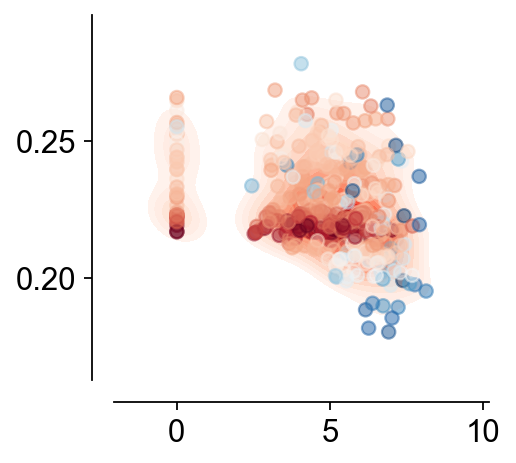

In [168]:
fig, ax = plt.subplots(figsize=(3,3))

x=ad[ad.obs['leiden'].isin(visual_cluster),'AFF3'].to_df().values.reshape(-1)
y=ad.obs.loc[ad.obs['leiden'].isin(visual_cluster),'palantir_pseudotime'].values.reshape(-1)
z=ad.obs.loc[ad.obs['leiden'].isin(visual_cluster),'mellon_log_density'].values.reshape(-1)

sns.kdeplot(
        x=x, y=y,
        fill=True,
        cmap='Reds',
        #clip=(-5, 5), cut=10,
        thresh=0.1, levels=15,
        ax=ax,
    )
ax.scatter(x,y,
           c=z,     
           cmap='RdBu_r',
          alpha=0.5)

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)


<AxesSubplot: >

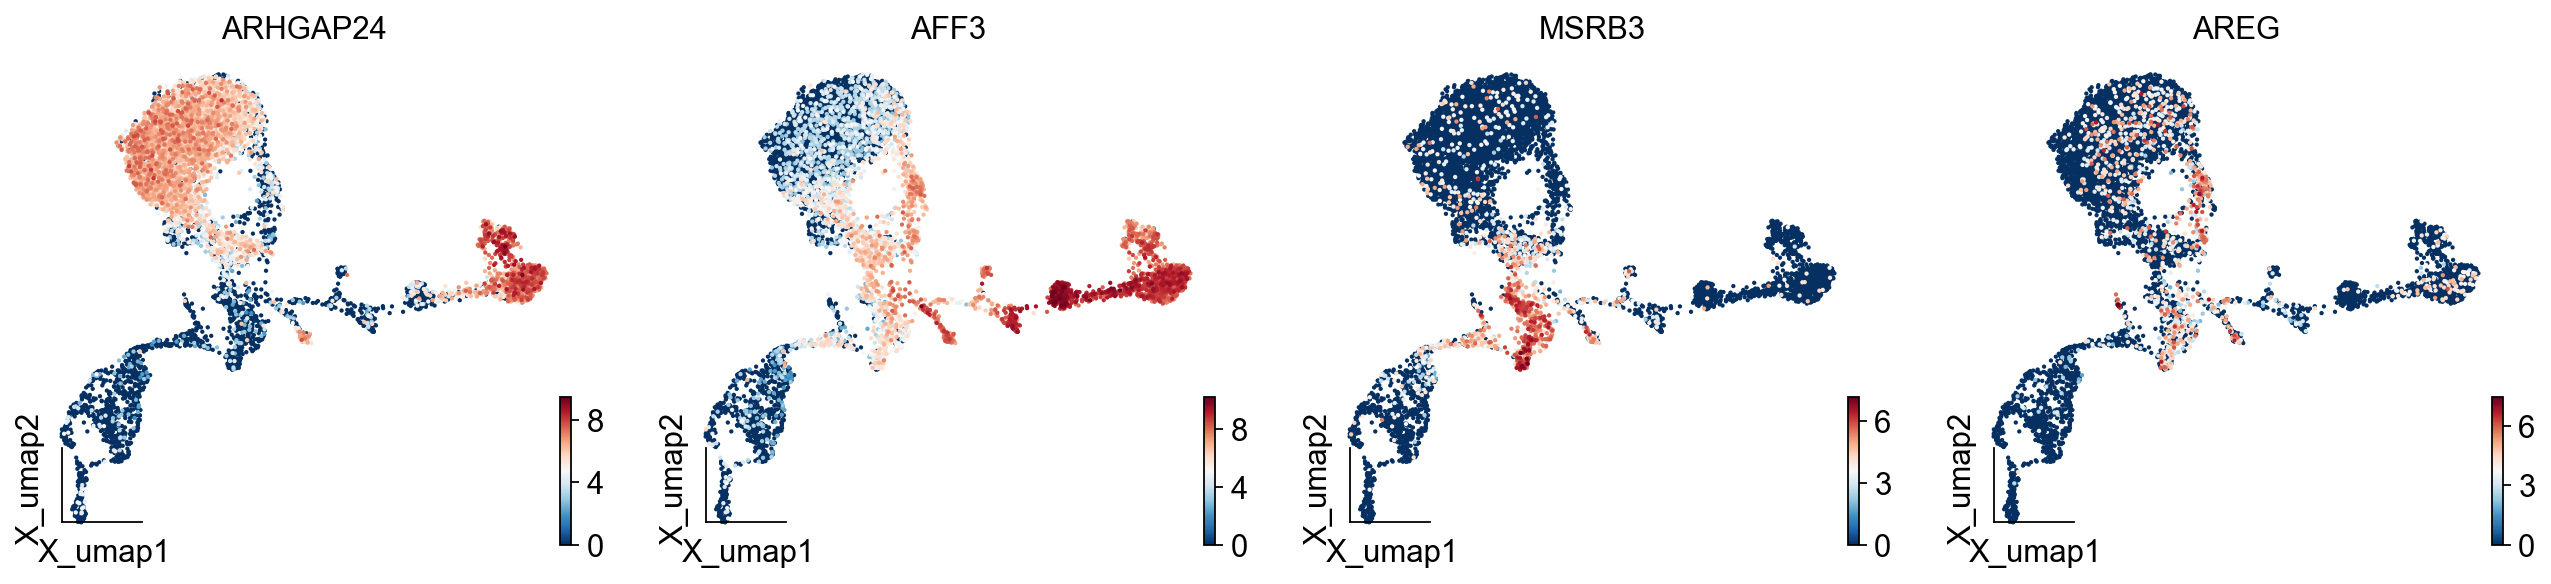

In [89]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
#fig, ax = plt.subplots(figsize=(3,3))

ov.pl.embedding(ad,
                basis='X_umap',
                color=['ARHGAP24','AFF3','MSRB3','AREG'],
                frameon='small',
                size=15,
               cmap='RdBu_r',)

In [78]:
visual_cluster

['5']

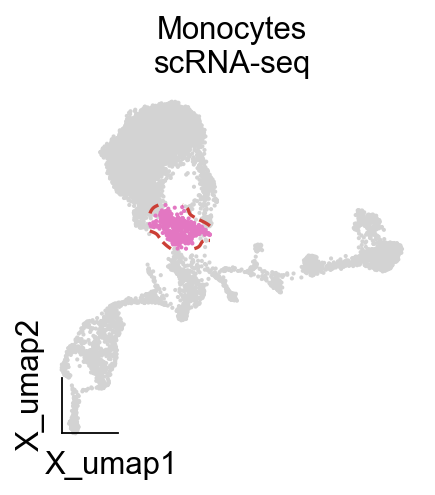

In [114]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(3,3))

visual_cluster=['6']
ad.obs['visual']=ad.obs['leiden'].copy()
ad.obs.loc[~ad.obs['leiden'].isin(visual_cluster),'visual']=None
ov.utils.embedding(ad,
                basis='X_umap',frameon='small',
                color=['visual'],
                legend_loc=None,
                #palette=ov.utils.blue_color+ov.utils.orange_color+ov.utils.red_color+ov.utils.green_color,
                show=False,
                  ax=ax)

ov.pl.contour(ax=ax,adata=ad,
        basis="X_umap",
        groupby='leiden',clusters=visual_cluster,
        contour_threshold=0.02,colors=ov.pl.red_color[2],linestyles='dashed')

plt.title('Monocytes\nscRNA-seq', fontsize=14)
plt.savefig(f'figures/hsc/umap-lineage-mono-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/hsc/umap-lineage-mono-33.pdf',dpi=300,bbox_inches='tight')


[Text(1, 0.5, 'DANT2'),
 Text(1, 1.5, 'RNF220'),
 Text(1, 2.5, 'AREG'),
 Text(1, 3.5, 'AFF3'),
 Text(1, 4.5, 'MSRB3'),
 Text(1, 5.5, 'NAALADL2'),
 Text(1, 6.5, 'KLF12'),
 Text(1, 7.5, 'LRMDA'),
 Text(1, 8.5, 'SLC8A1'),
 Text(1, 9.5, 'ARHGAP24')]

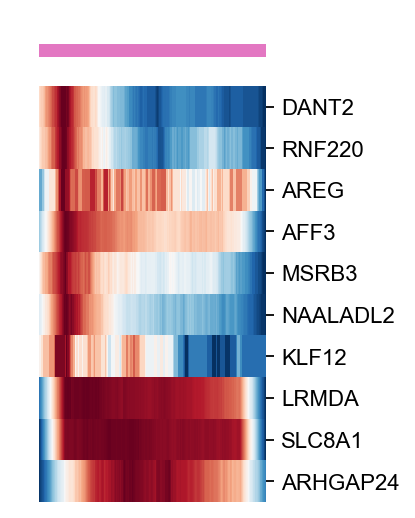

In [80]:
import matplotlib.pyplot as plt
g=ov.utils.plot_heatmap(ad[ad.obs['leiden'].isin(visual_cluster)],
                        var_names=scores.loc[cfg_obj2.filter_coef.index].sort_values(ascending=False)[:10].index.tolist(),
                  sortby='palantir_pseudotime',col_color='leiden',yticklabels=True,
                 n_convolve=100,figsize=(1,6),show=False)

g.fig.set_size_inches(2, 4)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=10)

[Text(1, 0.5, 'KLF12'),
 Text(1, 1.5, 'NAALADL2'),
 Text(1, 2.5, 'DANT2'),
 Text(1, 3.5, 'RNF220'),
 Text(1, 4.5, 'MSRB3'),
 Text(1, 5.5, 'AFF3'),
 Text(1, 6.5, 'LRMDA'),
 Text(1, 7.5, 'SLC8A1'),
 Text(1, 8.5, 'AREG'),
 Text(1, 9.5, 'ARHGAP24')]

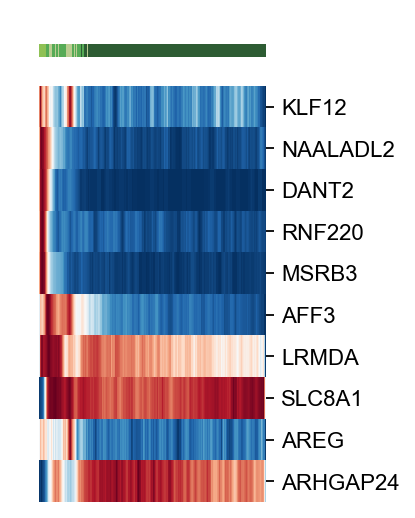

In [81]:
import matplotlib.pyplot as plt
g=ov.utils.plot_heatmap(ad[ad.obs['celltype'].isin(['MyeloidPre','MonoPre','Mono','cDC'])],
                        var_names=scores.loc[cfg_obj2.filter_coef.index].sort_values(ascending=False)[:10].index.tolist(),
                  sortby='palantir_pseudotime',col_color='celltype',yticklabels=True,
                 n_convolve=100,figsize=(1,6),show=False)

g.fig.set_size_inches(2, 4)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=10)